<a href="https://colab.research.google.com/github/ivonnics/Machine-Learning/blob/master/How_to_create_Unbalanced_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Taken from: https://machinelearningmastery.com/imbalanced-classification-is-hard/

## Muy buenos: https://medium.com/strands-tech-corner/unbalanced-datasets-what-to-do-144e0552d9cd & https://elitedatascience.com/imbalanced-classes

https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28

https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/

Size=100, Ratio=Counter({0: 99, 1: 1})
Size=1000, Ratio=Counter({0: 990, 1: 10})
Size=10000, Ratio=Counter({0: 9900, 1: 100})
Size=100000, Ratio=Counter({0: 99000, 1: 1000})


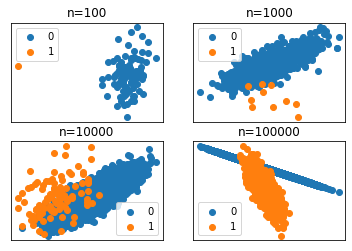

In [1]:
# vary the dataset size for a 1:100 imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# dataset sizes
sizes = [100, 1000, 10000, 100000]
# create and plot a dataset with each size
for i in range(len(sizes)):
	# determine the dataset size
	n = sizes[i]
	# create the dataset
	X, y = make_classification(n_samples=n, n_features=2, n_redundant=0,
		n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
	# summarize class distribution
	counter = Counter(y)
	print('Size=%d, Ratio=%s' % (n, counter))
	# define subplot
	pyplot.subplot(2, 2, 1+i)
	pyplot.title('n=%d' % n)
	pyplot.xticks([])
	pyplot.yticks([])
	# scatter plot of examples by class label
	for label, _ in counter.items():
		row_ix = where(y == label)[0]
		pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
	pyplot.legend()
# show the figure
pyplot.show()

In [2]:
pip install -U imbalanced-learn

     |████████████████████████████████| 163kB 2.7MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [13]:
# https://imbalanced-learn.readthedocs.io/en/stable/api.html
# https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/index.html
import pandas as pd
import imblearn.under_sampling as under
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
pd.Series(breast_cancer.target).value_counts()


1    357
0    212
dtype: int64

In [14]:
UnderSampling = under.ClusterCentroids(sampling_strategy={1:300, 0:212}, random_state=83, voting='hard')
x_resampled, y_resampled = UnderSampling.fit_resample(breast_cancer.data, breast_cancer.target)
pd.Series(y_resampled).value_counts()

1    300
0    212
dtype: int64

In [15]:
# https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset/46379878#46379878
# https://stackoverflow.com/questions/48769682/how-do-i-convert-data-from-a-scikit-learn-bunch-object-to-a-pandas-dataframe

def answer_one(): 
    import numpy as np
    import pandas as pd
    from sklearn.datasets import load_breast_cancer 
    cancer = load_breast_cancer()     
    data = np.c_[cancer.data, cancer.target]
    columns = np.append(cancer.feature_names, ["target"])
    return pd.DataFrame(data, columns=columns)

answer_one()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [40]:
# From: https://elitedatascience.com/imbalanced-classes
import pandas as pd
import numpy as np
 
# Read dataset
df = pd.read_csv('https://raw.githubusercontent.com/ivonnics/Machine-Learning/master/DATA/balance-scale.data', 
                 names=['balance', 'var1', 'var2', 'var3', 'var4'])
 
# Display example observations
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   balance  625 non-null    object
 1   var1     625 non-null    int64 
 2   var2     625 non-null    int64 
 3   var3     625 non-null    int64 
 4   var4     625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB
None


,balance,var1,var2,var3,var4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [20]:
print(df['balance'].value_counts())
print(df['var1'].value_counts())
print(df['var2'].value_counts())
print(df['var3'].value_counts())
print(df['var4'].value_counts())

R    288
L    288
B     49
Name: balance, dtype: int64
5    125
4    125
3    125
2    125
1    125
Name: var1, dtype: int64
5    125
4    125
3    125
2    125
1    125
Name: var2, dtype: int64
5    125
4    125
3    125
2    125
1    125
Name: var3, dtype: int64
5    125
4    125
3    125
2    125
1    125
Name: var4, dtype: int64


In [22]:
df['balance'] = [1 if b=='B' else 0 for b in df.balance]
df['balance'].value_counts()

0    576
1     49
Name: balance, dtype: int64

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
# Separate input features (X) and target variable (y)
y = df.balance
X = df.drop('balance', axis=1)
 
# Train model
clf_0 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_0 = clf_0.predict(X)
# How's the accuracy?
print( accuracy_score(pred_y_0, y) )

0.9216


In [26]:
# Should we be excited?
print( np.unique( pred_y_0 ) )

[0]


In [0]:
from sklearn.utils import resample

In [28]:
# Separate majority and minority classes
df_majority = df[df.balance==0]
df_minority = df[df.balance==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=576,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.balance.value_counts()

1    576
0    576
Name: balance, dtype: int64

In [29]:
# Separate input features (X) and target variable (y)
y = df_upsampled.balance
X = df_upsampled.drop('balance', axis=1)
 
# Train model
clf_1 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_1 = clf_1.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_1) )
# 0.513888888889

[0 1]
0.5147569444444444


In [30]:
# Separate majority and minority classes
df_majority = df[df.balance==0]
df_minority = df[df.balance==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=49,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.balance.value_counts()

1    49
0    49
Name: balance, dtype: int64

In [31]:

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
# Separate input features (X) and target variable (y)
y = df_downsampled.balance
X = df_downsampled.drop('balance', axis=1)
 
# Train model
clf_2 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_2 = clf_2.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_2 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_2) )
# 0.581632653061

[0 1]
0.5612244897959183


In [0]:
from sklearn.metrics import roc_auc_score

In [33]:
# Predict class probabilities
prob_y_2 = clf_2.predict_proba(X)
 
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]
 
prob_y_2[:5] # Example
# [0.45419197226479618,
#  0.48205962213283882,
#  0.46862327066392456,
#  0.47868378832689096,
#  0.58143856820159667]

[0.45153197257586,
 0.48726124480998256,
 0.47238960854127193,
 0.47014610622647623,
 0.587660295588417]

In [34]:
print( roc_auc_score(y, prob_y_2) )
# 0.568096626406

0.5651811745106206


In [35]:
prob_y_0 = clf_0.predict_proba(X)
prob_y_0 = [p[1] for p in prob_y_0]
 
print( roc_auc_score(y, prob_y_0) )
# 0.530718537415

0.4735526863806747


In [0]:
	from sklearn.svm import SVC

In [37]:

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
# Separate input features (X) and target variable (y)
y = df.balance
X = df.drop('balance', axis=1)
 
# Train model
clf_3 = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)
 
clf_3.fit(X, y)
 
# Predict on training set
pred_y_3 = clf_3.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_3 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_3) )
# 0.688
 
# What about AUROC?
prob_y_3 = clf_3.predict_proba(X)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(y, prob_y_3) )
# 0.5305236678

[0 1]
0.688
0.46947633219954643


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Separate input features (X) and target variable (y)
y = df.balance
X = df.drop('balance', axis=1)
 
# Train model
clf_4 = RandomForestClassifier()
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_4) )
# 0.9744
 
# What about AUROC?
prob_y_4 = clf_4.predict_proba(X)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y, prob_y_4) )
# 0.999078798186

[0 1]
1.0
1.0
